<a href="https://colab.research.google.com/github/fralfaro/MAT281_2023/blob/main/docs/labs/lab_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT281 - Laboratorios N°06

<a id='p1'></a>
## I.- Problema 01


<img src="https://drive.google.com/uc?export=view&id=1iLbdUKIrQByZ_yJFKOonV2VK4UL1aMvA" width = "400" align="center"/>



El **cuarteto de Anscombe** comprende cuatro conjuntos de datos que tienen las mismas propiedades estadísticas, pero que evidentemente son distintas al inspeccionar sus gráficos respectivos.

Cada conjunto consiste de once puntos (x, y) y fueron construidos por el estadístico F. J. Anscombe. El cuarteto es una demostración de la importancia de mirar gráficamente un conjunto de datos antes de analizarlos.

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats

def f(x):
  return peso * x + intersc

def rcuadrada(y, yhat) -> float:
    """
    Calculo del r-cuadrado
    """
    metrica = 0

    suma_y=sum(y)
    n=len(y)
    prom_y=suma_y/n

    SSreg=sum((yhat-prom_y)**2)
    SSres=sum((y-yhat)**2)
    SStot=SSres+SSreg

    metrica = SSreg/SStot

    return metrica

%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
# Cargar los datos del cuarteto de Anscombe
data = pd.read_csv("https://raw.githubusercontent.com/fralfaro/MAT281_2022/main/labs/lab_06/data/anscombe.csv")
data.head()

,x,y,grupo
0,10,8.04,Grupo_1
1,8,6.95,Grupo_1
2,13,7.58,Grupo_1
3,9,8.81,Grupo_1
4,11,8.33,Grupo_1


Basado en la información presentada responda las siguientes preguntas:

###1. Gráfique mediante un gráfico tipo **scatter** cada grupo. A simple vista, ¿ los grupos son muy distintos entre si?.

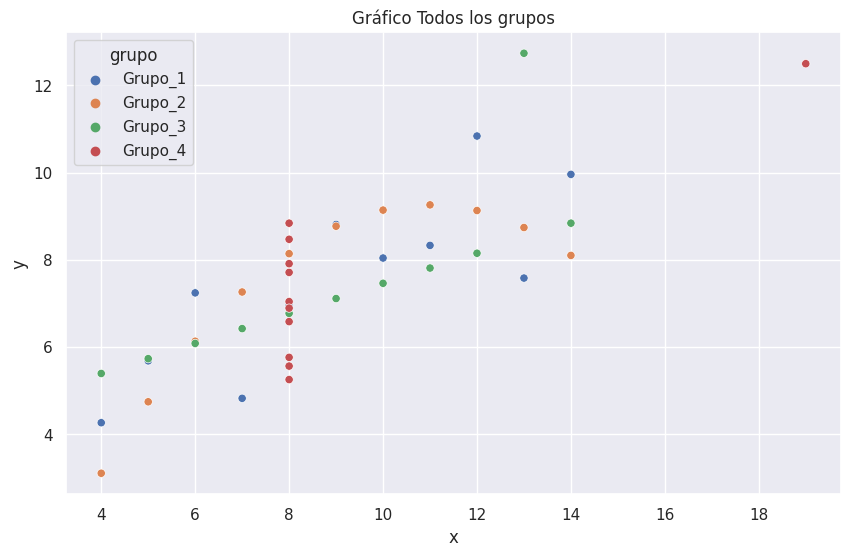

In [15]:
# Extracción de grupos
Grupo1= data[data["grupo"] == "Grupo_1"]
Grupo2= data[data["grupo"] == "Grupo_2"]
Grupo3 = data[data["grupo"] == "Grupo_3"]
Grupo4 = data[data["grupo"] == "Grupo_4"]

#Grafica de todos los grupos
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='x',
    y='y',
    hue='grupo',
    data=data
)

plt.title('Gráfico Todos los grupos')
plt.show()

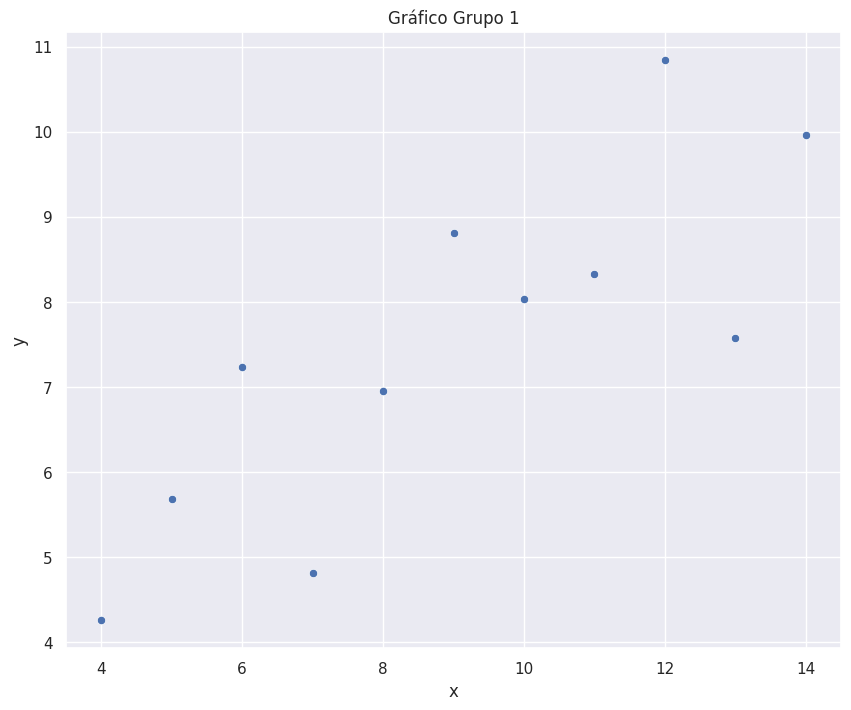

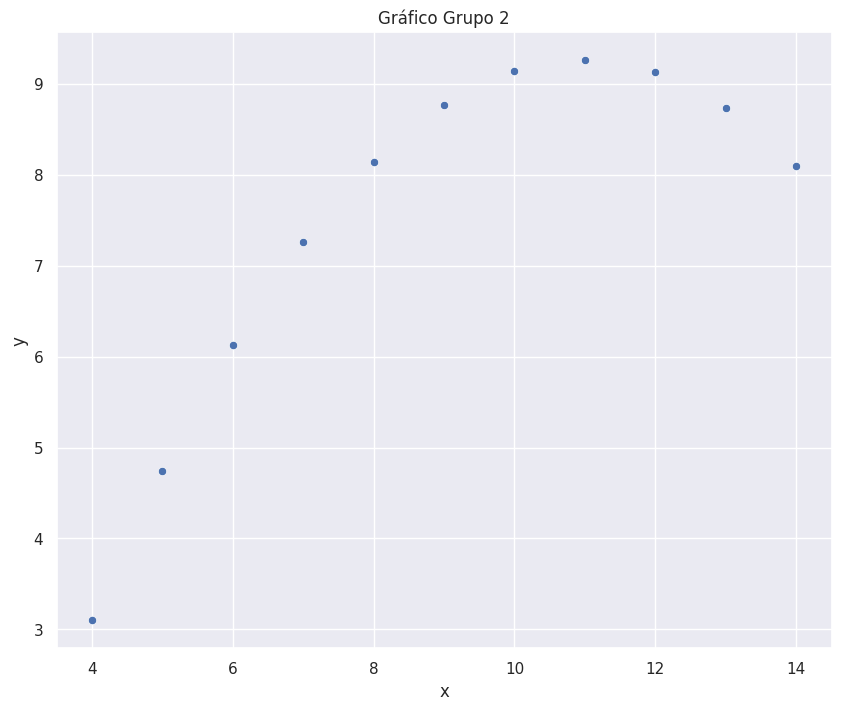

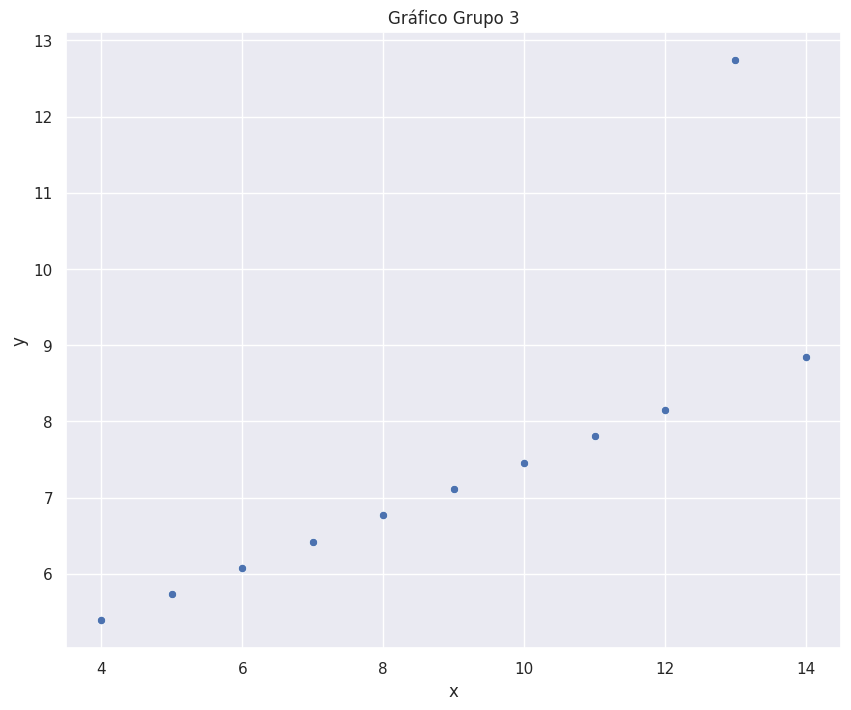

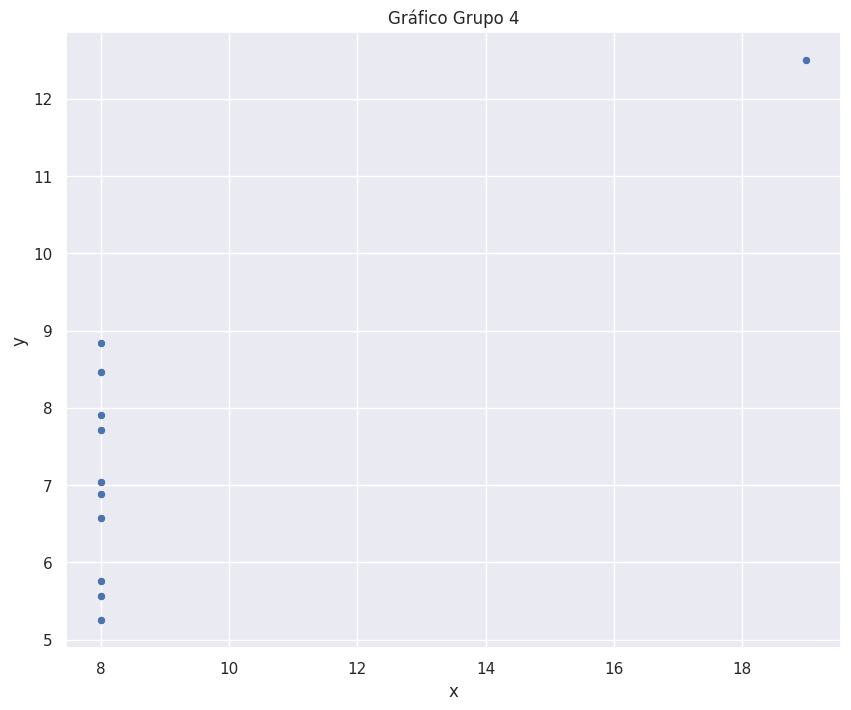

In [17]:
# Hagamos Plot de cada gráfico por separado
print("\n\n")
plt.figure(figsize=(10, 8)) # Grupo de datos nro.1
sns.scatterplot(
    x='x',
    y='y',
    data=Grupo1,
)
plt.title('Gráfico Grupo 1')
plt.show()

print("\n\n")
plt.figure(figsize=(10, 8)) # Grupo de datos nro.2
sns.scatterplot(
    x='x',
    y='y',
    data=Grupo2,
    )
plt.title('Gráfico Grupo 2')
plt.show()

print("\n\n")
plt.figure(figsize=(10, 8)) # Grupo de datos nro.3
sns.scatterplot(
    x='x',
    y='y',
    data=Grupo3,
    )
plt.title('Gráfico Grupo 3')
plt.show()

print("\n\n")
plt.figure(figsize=(10, 8)) # Grupo de datos nro.4
sns.scatterplot(
    x='x',
    y='y',
    data=Grupo4,
    )
plt.title('Gráfico Grupo 4')
plt.show()

El primer gráfico no nos permite determinar bien la distribución de cada uno. Por  separado, notamos que los tres presentan comportamientos distintos: El primero una distribución creciente, el segundo y el tercero más establecida, describiendo una parábola y una recta respectivamente. El último, parece ser una respuesta creciente a un mismo valor, y con un dato outlier cercano a 20.

###2. Realice un resumen de las medidas estadísticas más significativas ocuapando el comando `describe` para cada grupo. Interprete.

In [19]:
# Grupo 1
Grupo1.describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.031568
min,4.000000,4.260000
25%,6.500000,6.315000
50%,9.000000,7.580000
75%,11.500000,8.570000
max,14.000000,10.840000


In [20]:
# Grupo 2
Grupo2.describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.031657
min,4.000000,3.100000
25%,6.500000,6.695000
50%,9.000000,8.140000
75%,11.500000,8.950000
max,14.000000,9.260000


In [21]:
# Grupo 3
Grupo3.describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500000
std,3.316625,2.030424
min,4.000000,5.390000
25%,6.500000,6.250000
50%,9.000000,7.110000
75%,11.500000,7.980000
max,14.000000,12.740000


In [22]:
# Grupo 4
Grupo4.describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.030579
min,8.000000,5.250000
25%,8.000000,6.170000
50%,8.000000,7.040000
75%,8.000000,8.190000
max,19.000000,12.500000


Las medidas estadísticas más significativas por cada grupo difieren en centésimas. Pareciese tener las mismas distribuciones.


###3. Realice un ajuste lineal (con **sklearn**) y calcule los resultados de las métricas para cada grupo. Además, grafique los resultados de la regresión lineal para cada grupo. Interprete.


Error cuadrático medio:  1.2511536363636366
R^2:  0.6665424595087748




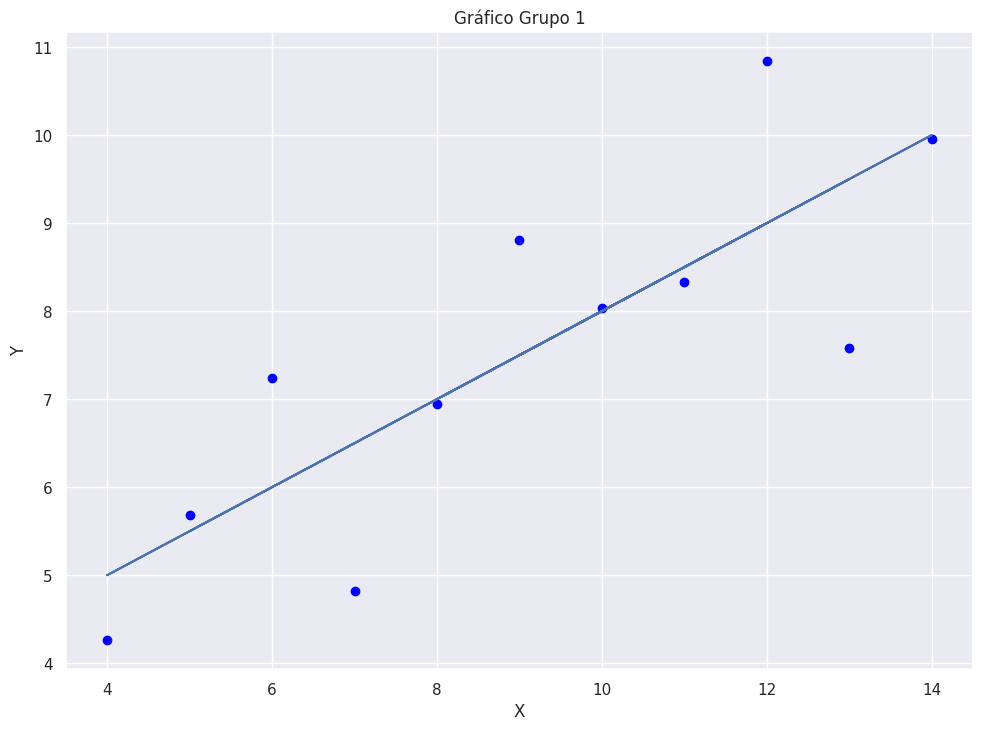

In [55]:
# Grupo 1

# Extraemos las variables
x1= np.array(Grupo1['x']).reshape(-1,1)
y1 = np.array(Grupo1['y'])

# Extraemos cada variable involucrada
model = LinearRegression()
model.fit(x1, y1)
slope = model.coef_[0]
intercept = model.intercept_

# Métricas
y1_pred = model.predict(x1)
print("\nError cuadrático medio: ", mean_squared_error(y1, y1_pred))
print("R^2: ", r2_score(y1, y1_pred))
print("\n")

# Graficamos
plt.title('Gráfico Grupo 1')
plt.scatter(x1, y1, color='blue')
plt.plot(x1, model.predict(x1))
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


Error cuadrático medio:  1.2523900826446281
R^2:  0.6662420337274844




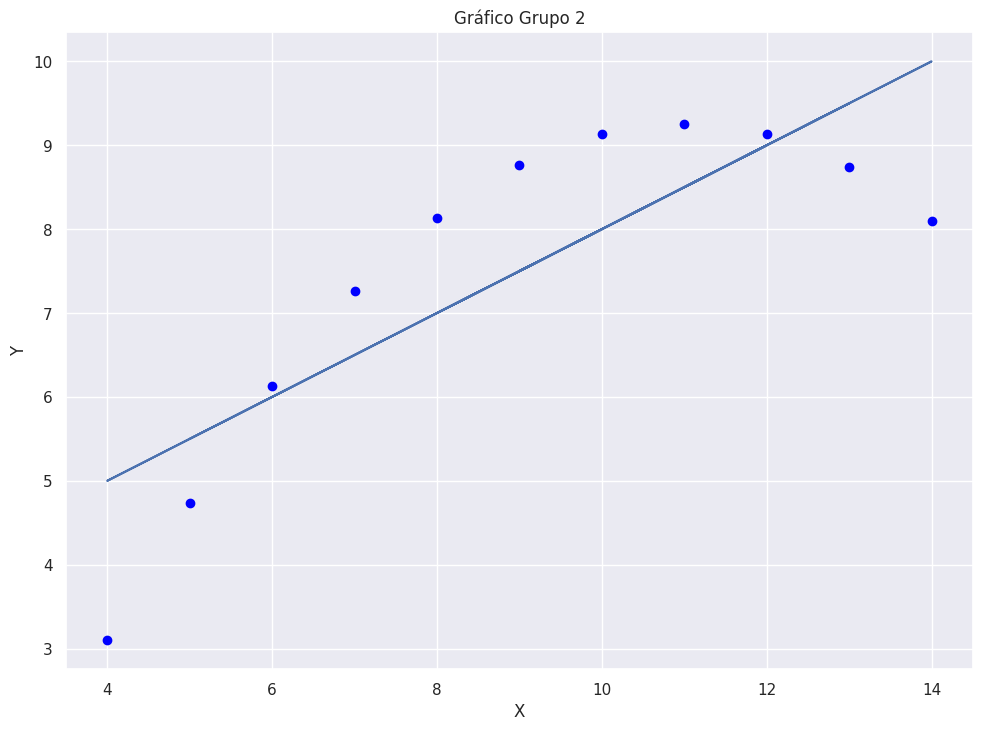

In [56]:
# Grupo 2

# Extraemos las variables
x2 = np.array(Grupo2['x']).reshape(-1,1)
y2 = np.array(Grupo2['y'])

# Extraemos cada variable involucrada
model = LinearRegression()
model.fit(x2, y2)
slope = model.coef_[0]
intercept = model.intercept_

# Métricas
y2_pred = model.predict(x2)
print("\nError cuadrático medio: ", mean_squared_error(y2, y2_pred))
print("R^2: ", r2_score(y2, y2_pred))
print("\n")

# Graficamos
plt.title('Gráfico Grupo 2')
plt.scatter(x2, y2, color='blue')
plt.plot(x2, model.predict(x2))
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


Error cuadrático medio:  1.2505628925619836
R^2:  0.6663240410665592




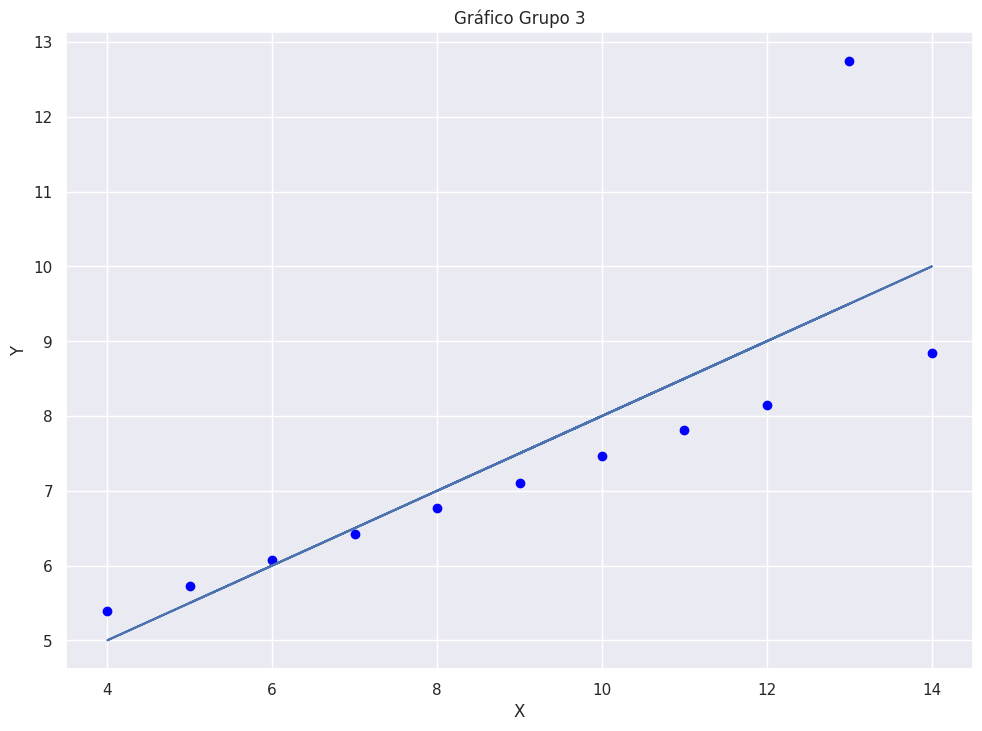

In [58]:
# Grupo 3

# Extraemos las variables
x3 = np.array(Grupo3['x']).reshape(-1,1)
y3 = np.array(Grupo3['y'])

# Extraemos cada variable involucrada
model = LinearRegression()
model.fit(x3, y3)
slope = model.coef_[0]
intercept = model.intercept_

# Métricas
y3_pred = model.predict(x3)
print("\nError cuadrático medio: ", mean_squared_error(y3, y3_pred))
print("R^2: ", r2_score(y3, y3_pred))
print("\n")

# Graficamos
plt.title('Gráfico Grupo 3')
plt.scatter(x3, y3, color='blue')
plt.plot(x3, model.predict(x3))
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


Error cuadrático medio:  1.249317272727273
R^2:  0.6667072568984653




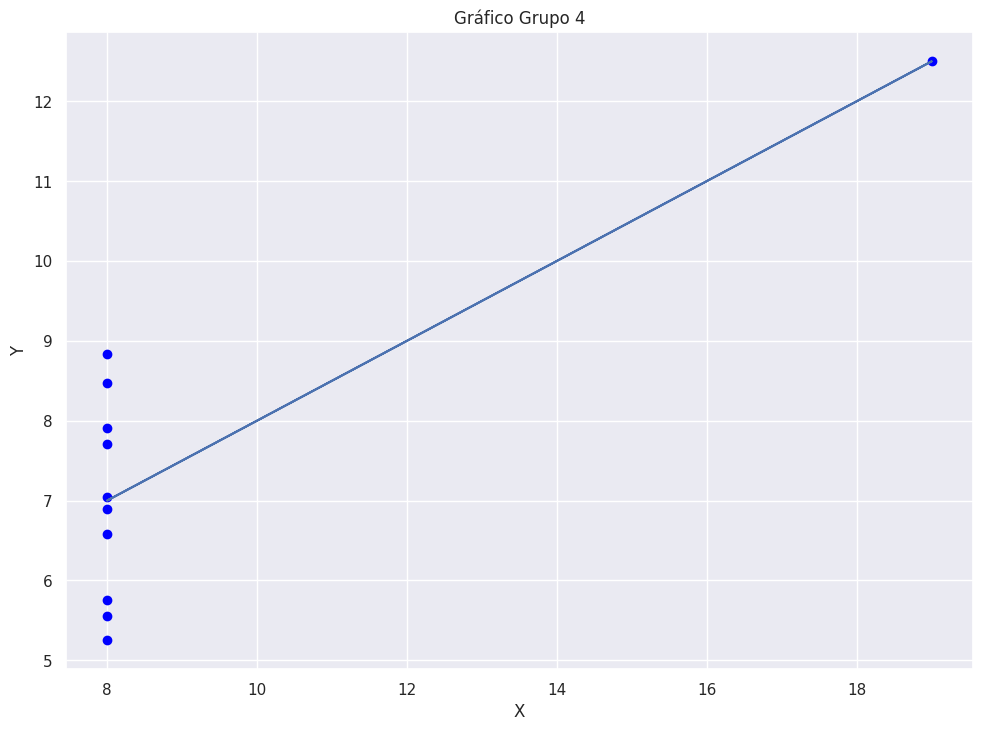

In [59]:
# Grupo 4

# Extraemos las variables
x4 = np.array(Grupo4['x']).reshape(-1,1)
y4 = np.array(Grupo4['y'])

# Extraemos cada variable involucrada
model = LinearRegression()
model.fit(x4, y4)
slope = model.coef_[0]
intercept = model.intercept_

# Métricas
y4_pred = model.predict(x4)
print("\nError cuadrático medio: ", mean_squared_error(y4, y4_pred))
print("R^2: ", r2_score(y4, y4_pred))
print("\n")

# Graficamos
plt.title('Gráfico Grupo 4')
plt.scatter(x4, y4, color='blue')
plt.plot(x4, model.predict(x4))
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

El error cuadrático medio de 1.25 y la correlación de 0.66 nos indica que el modelo predicho no es el mejor para todos los casos.

###4. Es claro que el ajuste lineal para algunos grupos no es el correcto. Existen varias formas de solucionar este problema (eliminar outliers, otros modelos, etc.). Identifique una estrategia para que el modelo de regresión lineal ajuste de mejor manera e implemente otros modelos en los casos que encuentre necesario.  

Para el modelo 1 y 4 no podemos hacer un ajuste dada la distribución: los datos de 1 están distribuidos muy dispersamente y los de 2 están distribuidos muy cercanamente (más de un y para un x). Apliquemos para los modelos 2 y 3 ajustes que nos permita representar los datos en una regresión lineal: Hagamos un ajuste polinómico para 2 y quitamos un dato en el grupo 3.

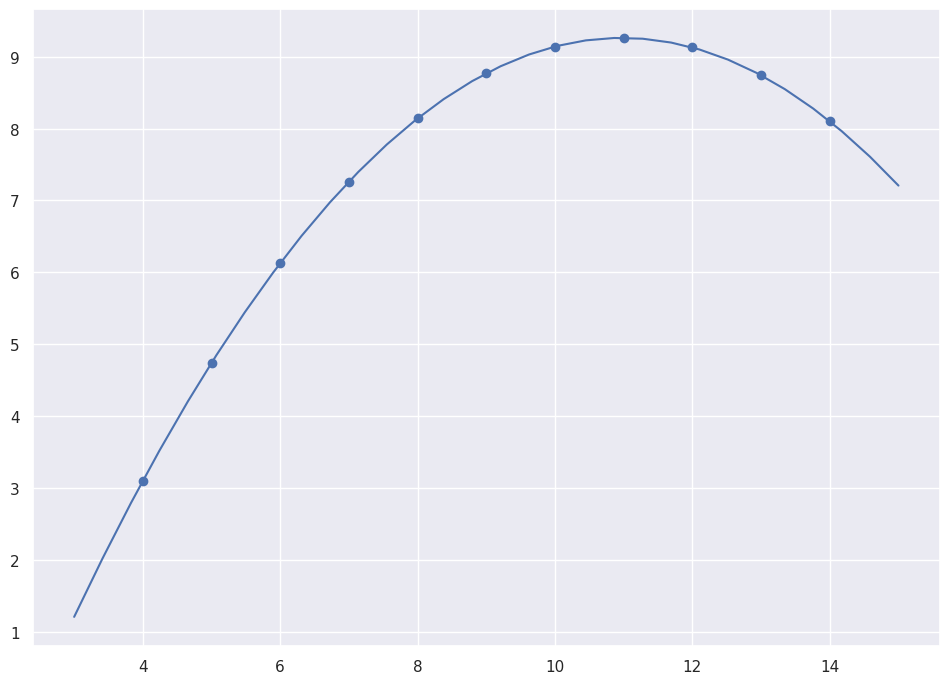

0.999999457857722

In [61]:
x=Grupo2['x'] #fijamos el eje x
y=Grupo2['y'] #fijamos el eje y

# Modelo polinomio de grado 2
line = np.linspace(3,15,30)
polymodel = np.poly1d(np.polyfit(x, y, 2))

plt.scatter(x, y)
plt.plot(line, polymodel(line))
plt.show()

rcuadrada(np.array(y), np.array(polymodel(x)))

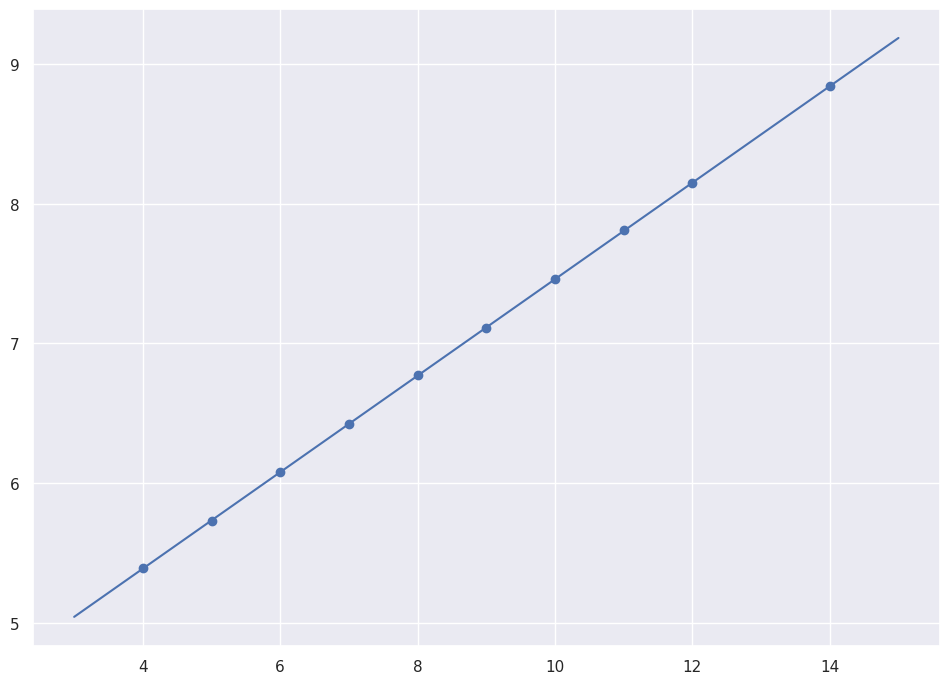

0.9999931075815331

In [62]:
Grupo3 = Grupo3.drop(24)
x = Grupo3["x"]
y = Grupo3["y"]

linearmodel = np.poly1d(np.polyfit(x, y, 1))
line = np.linspace(3,15,30)
plt.scatter(x, y)
plt.plot(line, linearmodel(line))
plt.show()

rcuadrada(np.array(y), np.array(linearmodel(x)))